In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
import os
from pathlib import Path
from sklearn import svm
import cv2
from sklearn.linear_model import LogisticRegression

# Dataset Preparation

In [2]:
training_dataset_path = Path("./Train/Images/")
test_dataset_path = Path("./Test/Images/")

In [3]:
train_data = pd.read_csv('Train/train.csv')
test_data = pd.read_csv('Test/test.csv')

In [4]:
train_data

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu
...,...,...
299,616.jpg,Charmander
300,617.jpg,Charmander
301,618.jpg,Charmander
302,619.jpg,Charmander


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        304 non-null    object
 1   NameOfPokemon  304 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [6]:
train_data.describe()

,ImageId,NameOfPokemon
count,304,304
unique,304,3
top,357.jpg,Charmander
freq,1,102


In [7]:
pokeData = dict(train_data['NameOfPokemon'].value_counts())
pokeData

{'Charmander': 102, 'Bulbasaur': 101, 'Pikachu': 101}

In [8]:
Bulbasaur = train_data[train_data['NameOfPokemon'] == 'Bulbasaur']
Charmander = train_data[train_data['NameOfPokemon'] == 'Charmander']
Pikachu = train_data[train_data['NameOfPokemon'] == 'Pikachu']

In [9]:
Pikachu['ImageId'].loc[100]

'396.jpg'

In [10]:
dict_lables = {
    'Pikachu' : 0,
    'Charmander' : 1,
    'Bulbasaur' : 2
}

In [11]:
dict_lables

{'Pikachu': 0, 'Charmander': 1, 'Bulbasaur': 2}

In [12]:
dirs = training_dataset_path.glob('*')

In [13]:
labels = []
image_data = []
label = 0
i = 0
for img_name in dirs:
    #     print(img_name)
    if(i == 101 or i == 202):
        label += 1
        print(img_name)
    
    img = image.load_img(img_name , target_size=(100 , 100) )
    img_array = image.img_to_array(img , dtype='float32')/255
    #     print(img_array)
    image_data.append(img_array)

    labels.append(label)
    i+= 1

Train\Images\397.jpg
Train\Images\498.jpg


c:\python3.9\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
print(len(image_data))
print(len(labels))

304
304


In [15]:
np.unique(labels , return_counts=True)

(array([0, 1, 2]), array([101, 101, 102], dtype=int64))

In [16]:
image_data = np.array(image_data)
labels = np.array(labels)

In [17]:
print(image_data.shape)
print(labels.shape)

(304, 100, 100, 3)
(304,)


# Shuffle the data

In [18]:
combined = list(zip(image_data , labels))

In [19]:

np.random.shuffle(combined)

In [20]:
image_data[:] , labels[:] = zip(*combined)

In [21]:
image_data.shape

(304, 100, 100, 3)

In [22]:
labels

array([2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1,
       1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1,

# Visualise the data

In [23]:
def drawImg(img):
    plt.imshow(img)
    plt.axis('off')
    cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.show()
    

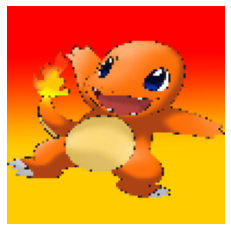

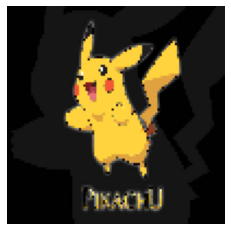

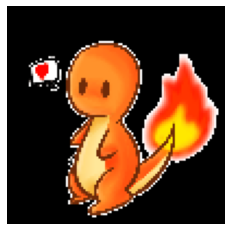

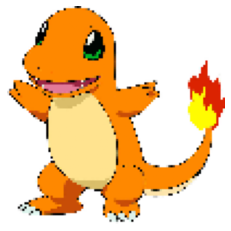

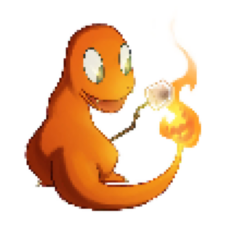

In [24]:
for i in range(5):
    drawImg(image_data[i])

In [25]:
test_data

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg
...,...
118,1124.jpg
119,2014.jpg
120,2235.jpg
121,1126.jpg


In [26]:
dirs_ = test_dataset_path.glob('*')

In [27]:
x_test = []

for img_path in dirs_:
    # print(img_path)
    test_img = image.load_img(img_path , target_size=(100 , 100))
    test_array = image.img_to_array(test_img , dtype='float32')/255.0
    x_test.append(test_array)
    

In [28]:
print(x_test)

[array([[[0.74509805, 0.87058824, 0.41960785],
        [0.7647059 , 0.88235295, 0.44705883],
        [0.7764706 , 0.88235295, 0.46666667],
        ...,
        [0.07058824, 0.37254903, 0.67058825],
        [0.05490196, 0.34117648, 0.63529414],
        [0.05098039, 0.28627452, 0.5568628 ]],

       [[0.7294118 , 0.87058824, 0.40392157],
        [0.7411765 , 0.8784314 , 0.42352942],
        [0.7647059 , 0.8784314 , 0.45490196],
        ...,
        [0.07450981, 0.38431373, 0.6784314 ],
        [0.06666667, 0.36078432, 0.67058825],
        [0.04705882, 0.30588236, 0.59607846]],

       [[0.7137255 , 0.8666667 , 0.39215687],
        [0.73333335, 0.87058824, 0.4117647 ],
        [0.7411765 , 0.8745098 , 0.4392157 ],
        ...,
        [0.06666667, 0.3882353 , 0.6901961 ],
        [0.07058824, 0.3647059 , 0.6745098 ],
        [0.06666667, 0.32156864, 0.6117647 ]],

       ...,

       [[0.92156863, 0.77254903, 0.41960785],
        [0.91764706, 0.76862746, 0.40784314],
        [0.92941177, 

In [29]:
x_test = np.array(x_test)

In [30]:
actual_test_shape = x_test.shape
print(x_test.shape , len(x_test))

(123, 100, 100, 3) 123


In [31]:
m_test = x_test.shape[0]
x_test = x_test.reshape((m_test , -1))
x_test.shape

(123, 30000)

In [32]:

m = image_data.shape[0]
image_data = image_data.reshape((m , -1))
print(image_data.shape)

(304, 30000)


# using svm for classification

In [33]:
svm_classification = svm.SVC(kernel='linear' , C = 0.5)

In [34]:
svm_classification.fit(image_data , labels)
svm_classification.score(image_data , labels)

0.6842105263157895

In [35]:
y_pred = svm_classification.predict(x_test)

In [36]:
print(y_pred)

[1 0 1 1 1 1 1 1 0 1 1 1 0 1 2 1 1 1 0 1 1 1 1 0 1 1 1 2 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 0 2 0 0 0 0 1 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 0 2 2 0 0
 2 1 2 0 0 0 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2]


In [37]:
y_pred.shape

(123,)

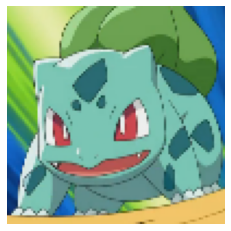

Prediction is : Bulbasaur


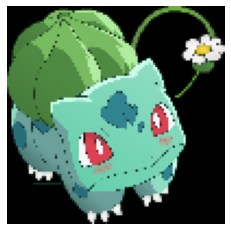

Prediction is : Pikachu


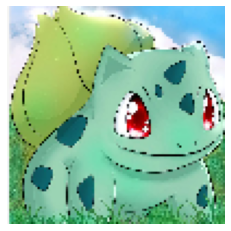

Prediction is : Bulbasaur


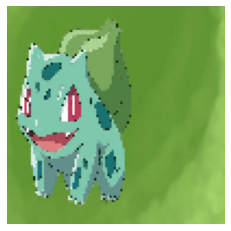

Prediction is : Bulbasaur


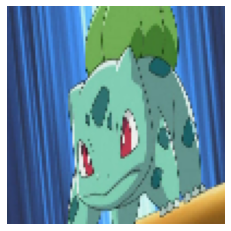

Prediction is : Bulbasaur


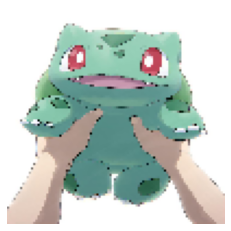

Prediction is : Bulbasaur


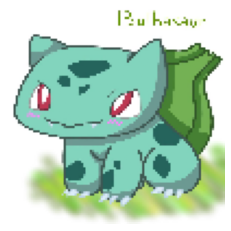

Prediction is : Bulbasaur


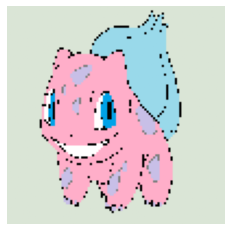

Prediction is : Bulbasaur


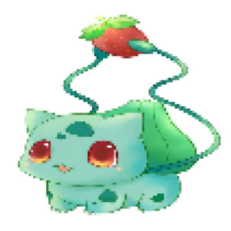

Prediction is : Pikachu


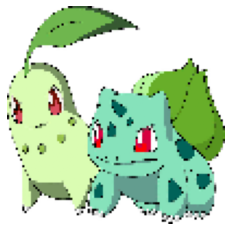

Prediction is : Bulbasaur


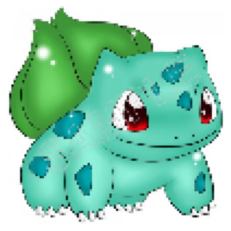

Prediction is : Bulbasaur


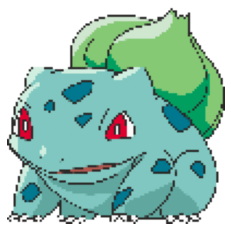

Prediction is : Bulbasaur


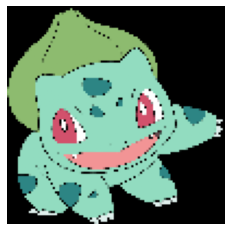

Prediction is : Pikachu


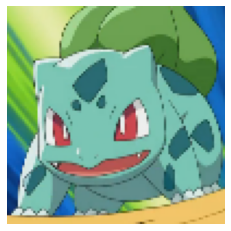

Prediction is : Bulbasaur


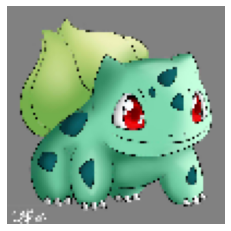

Prediction is : Charmander


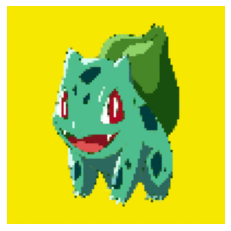

Prediction is : Bulbasaur


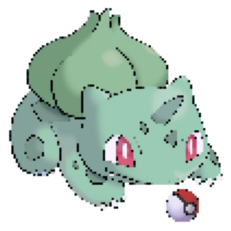

Prediction is : Bulbasaur


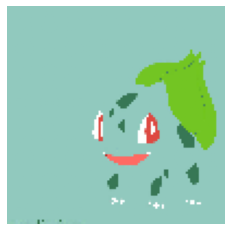

Prediction is : Bulbasaur


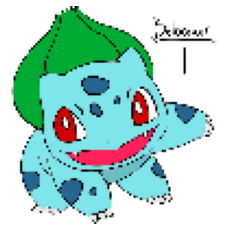

Prediction is : Pikachu


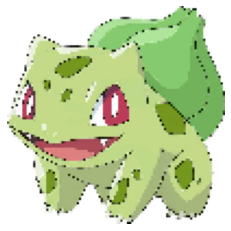

Prediction is : Bulbasaur


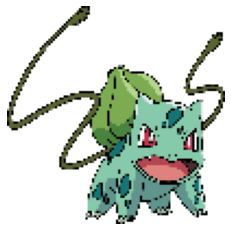

Prediction is : Bulbasaur


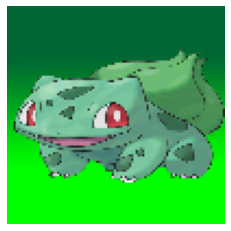

Prediction is : Bulbasaur


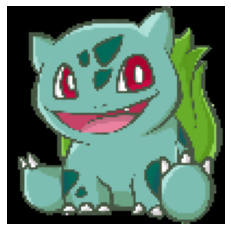

Prediction is : Bulbasaur


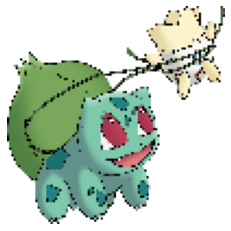

Prediction is : Pikachu


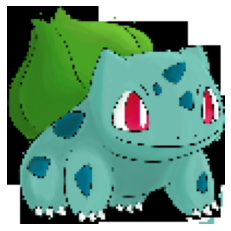

Prediction is : Bulbasaur


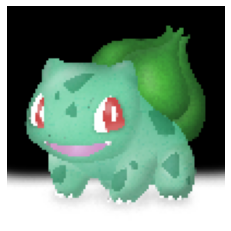

Prediction is : Bulbasaur


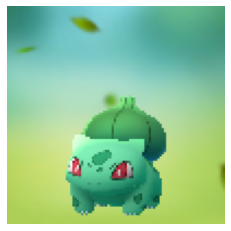

Prediction is : Bulbasaur


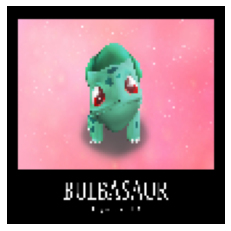

Prediction is : Charmander


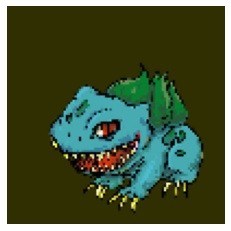

Prediction is : Bulbasaur


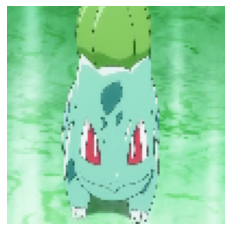

Prediction is : Bulbasaur


In [38]:


new_x_test = x_test.reshape(actual_test_shape)
for i in range(30):
    drawImg(new_x_test[i])
    print("Prediction is : ", end = "")
    if(y_pred[i] == 1):
        print("Bulbasaur")
    elif(y_pred[i] == 0):
        print("Pikachu")
    else:
        print("Charmander")

In [39]:
def accuracy(x , y):
    y_predict = svm_classification.predict(x)
    #     y_predict = lg.predict(y)
    count = 0
    for i in range(x.shape[0]):
        if(y_predict[i] == y[i]):
            count += 1
    return count/x.shape[0]

In [40]:
print("Accuracy of algorithm is : " , accuracy(image_data , labels))


Accuracy of algorithm is :  0.6842105263157895


# Lets use logistics regression 

In [41]:
# lg = LogisticRegression(max_iter=100)

In [42]:
# lg.fit(image_data , labels )

In [43]:
# pred = lg.predict(x_test)

In [44]:
# pred

In [45]:
# accuracy(image_data , labels)